In [1]:
#loading the required libraries.
#This is my first time working with some dataset.

import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns

Proceeding towards data preprocessing

In [2]:
#loading the data to panda data frame from the csv file present in root folder
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
header = pd.read_csv("header.txt", sep="-", header=None)
data.columns = header[1]
data.head()
print(data.dtypes)


1
 id                           int64
 age                        float64
 blood pressure             float64
 specific gravity           float64
 albumin                    float64
 sugar                      float64
 red blood cells             object
 pus cell                    object
 pus cell clumps             object
 bacteria                    object
 blood glucose random       float64
 blood urea                 float64
 serum creatinine           float64
 sodium                     float64
 potassium                  float64
 haemoglobin                float64
 packed cell volume          object
 white blood cell count      object
 red blood cell count        object
 hypertension                object
 diabetes mellitus           object
 coronary artery disease     object
 appetite                    object
 pedal edema                 object
 anemia                      object
 class                       object
dtype: object


In [4]:
for i in [' packed cell volume', ' white blood cell count', ' red blood cell count']:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    print(data[i].dtypes)



float64
float64
float64


In [5]:
data.drop(' id', axis=1, inplace=True)
data.head()


1,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Proceeding to clean the data

In [6]:
#lets first categorise our features into categorial feature and numeric feature
cat_features = [features for features in data.columns if data[features].dtypes=='object']
num_features = [features for features in data.columns if data[features].dtypes!='object']

In [7]:
# Now we will check what are the different unique values of a particular feature
# We are doing so as to check for unclean data values
for i in cat_features:
    print("Feature {}: {}".format(i,data[i].unique()))

Feature  red blood cells: [nan 'normal' 'abnormal']
Feature  pus cell: ['normal' 'abnormal' nan]
Feature  pus cell clumps: ['notpresent' 'present' nan]
Feature  bacteria: ['notpresent' 'present' nan]
Feature  hypertension: ['yes' 'no' nan]
Feature  diabetes mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Feature  coronary artery disease: ['no' 'yes' '\tno' nan]
Feature  appetite: ['good' 'poor' nan]
Feature  pedal edema: ['no' 'yes' nan]
Feature  anemia: ['no' 'yes' nan]
Feature  class: ['ckd' 'ckd\t' 'notckd']


In [8]:
data[' diabetes mellitus'].replace({'\tno':'no', '\tyes':'yes'}, inplace=True)
data[' coronary artery disease'].replace({'\tno':'no', '\tyes':'yes'}, inplace=True)
data[' class'].replace({'ckd\t': 'ckd'}, inplace=True)
for i in cat_features:
    print("Feature {}: {}".format(i,data[i].unique()))

Feature  red blood cells: [nan 'normal' 'abnormal']
Feature  pus cell: ['normal' 'abnormal' nan]
Feature  pus cell clumps: ['notpresent' 'present' nan]
Feature  bacteria: ['notpresent' 'present' nan]
Feature  hypertension: ['yes' 'no' nan]
Feature  diabetes mellitus: ['yes' 'no' ' yes' nan]
Feature  coronary artery disease: ['no' 'yes' nan]
Feature  appetite: ['good' 'poor' nan]
Feature  pedal edema: ['no' 'yes' nan]
Feature  anemia: ['no' 'yes' nan]
Feature  class: ['ckd' 'notckd']


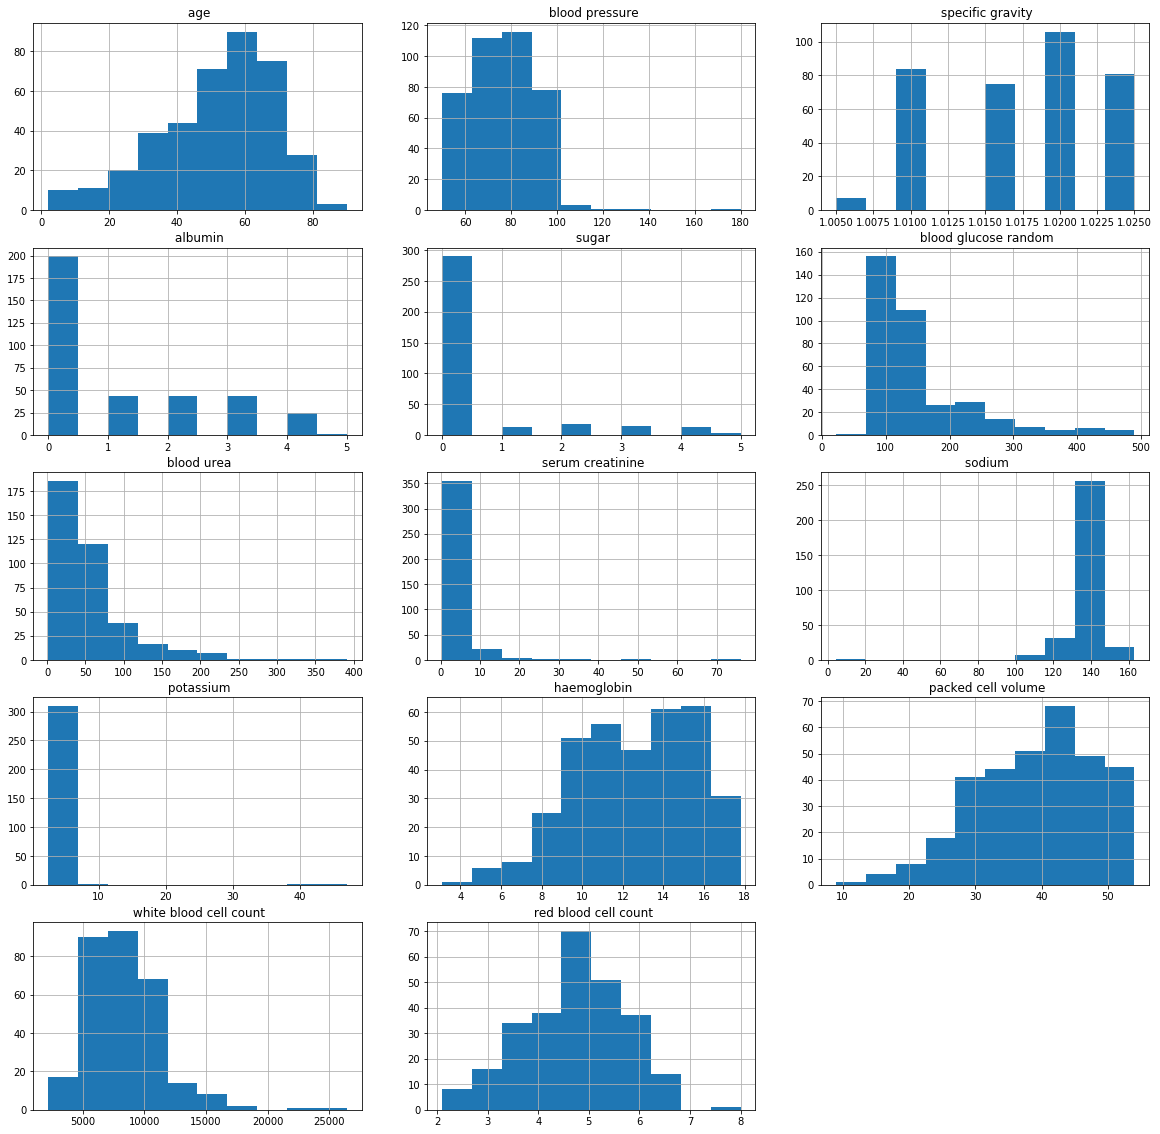

In [9]:
k=0
fig = pyplot.figure(figsize=(20,20))
for i in num_features:
    pyplot.subplot(5,3,k+1)
    data[i].hist()
    pyplot.title(i)
    k+=1

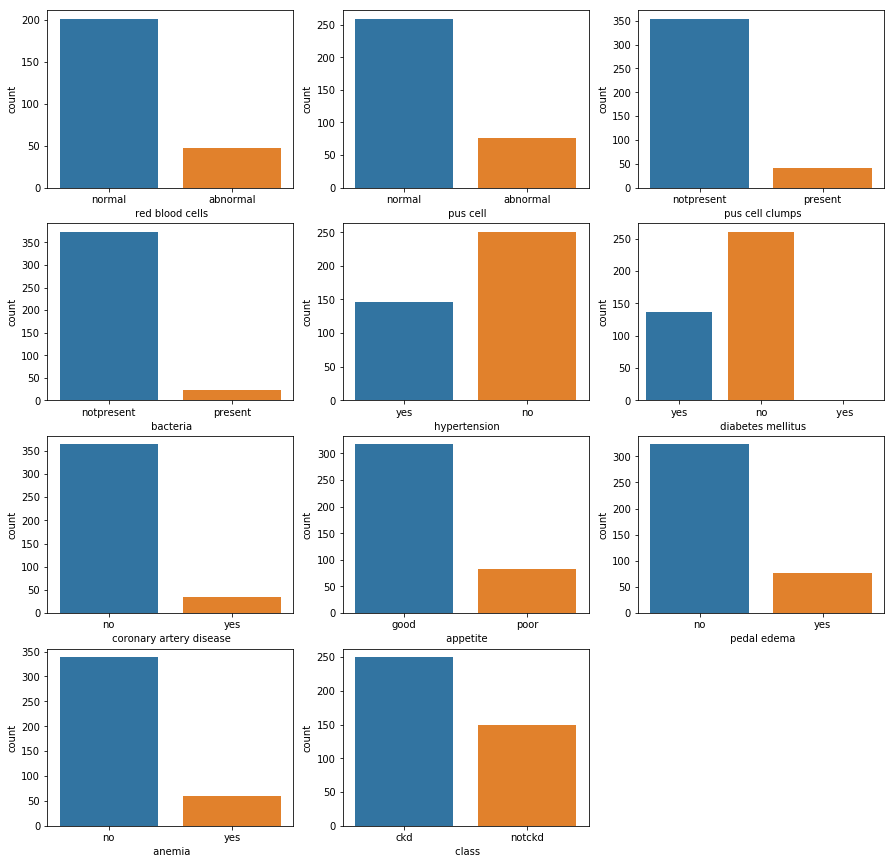

In [10]:
k=0
fig = pyplot.figure(figsize=(15,15))
for i in cat_features:
    pyplot.subplot(4,3,k+1)
    sns.countplot(data[i])
    k+=1


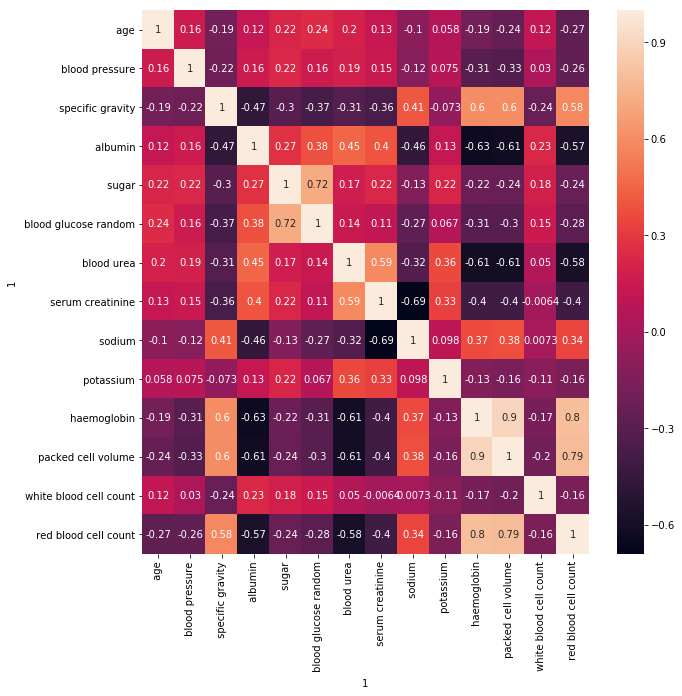

In [11]:
#checking out the correlation between different features
fig = pyplot.figure(figsize=(10,10))
data.corr()
sns.heatmap(data.corr(), annot = True)


In [12]:
data.groupby([' red blood cells',' class'])[' red blood cell count'].agg(['count','mean', 'median', 'max', 'min'])

count      mean  median  max  min
 red blood cells  class                                   
abnormal         ckd        25  3.832000     3.7  5.6  2.5
normal           ckd        40  3.782500     3.8  8.0  2.1
                 notckd    134  5.368657     5.3  6.5  4.4

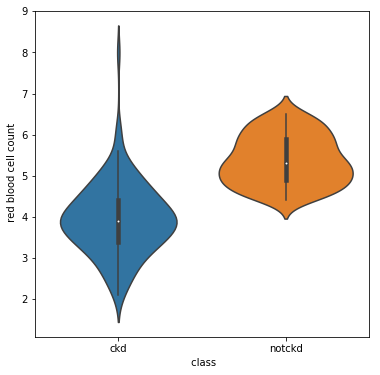

In [13]:
pyplot.figure(figsize=(6,6))


def v_plot(feature):
    plot_= sns.violinplot(data=data, x= ' class' , y=feature )
    return plot_

v_plot(' red blood cell count')



In [14]:
data.columns

Index([' age', ' blood pressure', ' specific gravity', ' albumin', ' sugar',
       ' red blood cells', ' pus cell', ' pus cell clumps', ' bacteria',
       ' blood glucose random', ' blood urea', ' serum creatinine', ' sodium',
       ' potassium', ' haemoglobin', ' packed cell volume',
       ' white blood cell count', ' red blood cell count', ' hypertension',
       ' diabetes mellitus', ' coronary artery disease', ' appetite',
       ' pedal edema', ' anemia', ' class'],
      dtype='object', name=1)

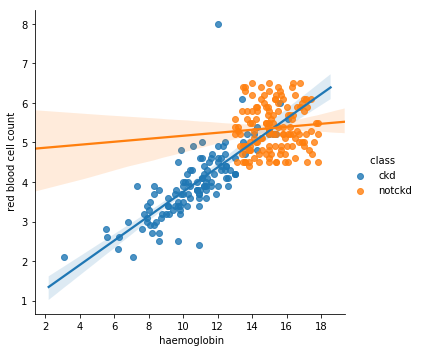

In [15]:
# finding the relationship between heamoglobin and red blood cell count

#automating the regression plot 
def reg_plot(feature_x, feature_y):
    plot_ = sns.lmplot(data = data, x=feature_x, y=feature_y, hue = ' class')
    return plot_

reg_plot(' haemoglobin', ' red blood cell count')



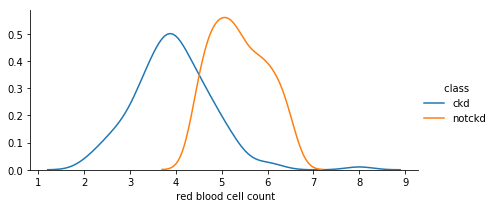

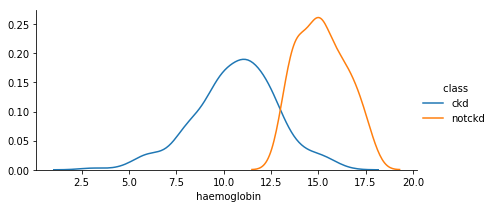

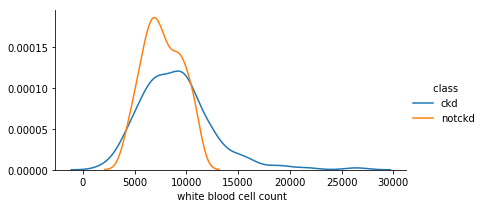

In [16]:
#analysing the dsitribution of red blood cell count for ckd and non ckd class

# automating the distribution plot by just passing the feature
def kde_plot(feature):
    multi_plot = sns.FacetGrid(data = data, hue = ' class', aspect= 2)
    multi_plot.map(sns.kdeplot, feature)
    multi_plot.add_legend()
    return multi_plot

    
kde_plot(' red blood cell count')
kde_plot(' haemoglobin')
kde_plot(' white blood cell count')




In [17]:
# filling up the rn values
data.isnull().sum().sort_values(ascending= False)

1
 red blood cells            152
 red blood cell count       131
 white blood cell count     106
 potassium                   88
 sodium                      87
 packed cell volume          71
 pus cell                    65
 haemoglobin                 52
 sugar                       49
 specific gravity            47
 albumin                     46
 blood glucose random        44
 blood urea                  19
 serum creatinine            17
 blood pressure              12
 age                          9
 bacteria                     4
 pus cell clumps              4
 hypertension                 2
 diabetes mellitus            2
 coronary artery disease      2
 anemia                       1
 appetite                     1
 pedal edema                  1
 class                        0
dtype: int64

In [18]:
def nan_filler(feature):
    rn_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    rn_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = rn_sample
    data[feature]
for i in num_features:
    nan_filler(i)
    


In [19]:
data[cat_features].isnull().sum()

1
 red blood cells            152
 pus cell                    65
 pus cell clumps              4
 bacteria                     4
 hypertension                 2
 diabetes mellitus            2
 coronary artery disease      2
 appetite                     1
 pedal edema                  1
 anemia                       1
 class                        0
dtype: int64

In [20]:
def nan_cat_filler(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)
for i in cat_features:
    nan_cat_filler(i)

    
data[cat_features].isnull().sum()
    

1
 red blood cells            0
 pus cell                   0
 pus cell clumps            0
 bacteria                   0
 hypertension               0
 diabetes mellitus          0
 coronary artery disease    0
 appetite                   0
 pedal edema                0
 anemia                     0
 class                      0
dtype: int64

In [21]:
# applying feature encoding
for i in cat_features:
    print('{} - {} unique features'.format(i, data[i].nunique()))

 red blood cells - 2 unique features
 pus cell - 2 unique features
 pus cell clumps - 2 unique features
 bacteria - 2 unique features
 hypertension - 2 unique features
 diabetes mellitus - 3 unique features
 coronary artery disease - 2 unique features
 appetite - 2 unique features
 pedal edema - 2 unique features
 anemia - 2 unique features
 class - 2 unique features


In [22]:
# since no feature with large number diff categorical data, apply feature encoding on all
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in cat_features:
    data[i] = l.fit_transform(data[i])

In [23]:
data.head()

1,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,...,38.0,6000.0,2.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.9,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
ind_features = [i for i in data.columns if i!=' class']
dep_features = ' class'

In [27]:
X=data[ind_features]
y=data[dep_features]

In [28]:
X.head()

1,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,...,11.3,38.0,6000.0,2.8,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,3.9,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  class, dtype: int32

In [30]:
top_features = SelectKBest(chi2, k=20)
top_features.fit(X,y)

SelectKBest(k=20, score_func=<function chi2 at 0x0000022DFB1A4400>)

In [33]:
f_score = pd.DataFrame(top_features.scores_, columns=['Score'])

In [35]:
top_feature_df = pd.DataFrame(X.columns)

In [40]:
df_scores = pd.concat([top_feature_df, f_score],axis=1)

In [47]:
df_scores.columns = ['feature', 'score']
df_scores.nlargest(10, 'score')['feature'].values

array([' white blood cell count', ' blood urea', ' blood glucose random',
       ' packed cell volume', ' serum creatinine', ' albumin',
       ' haemoglobin', ' age', ' sugar', ' hypertension'], dtype=object)

In [51]:
X_new = data[df_scores.nlargest(10, 'score')['feature'].values]
X_new.shape

(400, 10)

In [52]:
X_new.head()


1,white blood cell count,blood urea,blood glucose random,packed cell volume,serum creatinine,albumin,haemoglobin,age,sugar,hypertension
0,7800.0,36.0,121.0,44.0,1.2,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,117.0,38.0,0.8,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,31.0,1.8,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,32.0,3.8,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,35.0,1.4,2.0,11.6,51.0,0.0,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, random_state = 0,test_size = 0.25)
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [57]:
y_train.value_counts()

0    188
1    112
Name:  class, dtype: int64

In [58]:
from xgboost import XGBClassifier

In [59]:
params ={
    'learning_rate': [0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [60]:
classifier = XGBClassifier()

In [61]:
from sklearn.model_selection import RandomizedSearchCV
ran_search = RandomizedSearchCV(classifier, params,n_iter=5,scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)
ran_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


[13:10:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\machine_learning\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.2, 0.25], 'max_depth': [5, 8, 10], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.4], 'colsample_bytree': [0.3, 0.4, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [62]:
ran_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [63]:
ran_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [65]:
classifier =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=3, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [66]:
classifier.fit(X_train, y_train)

[13:12:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\machine_learning\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [69]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1])

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
confusion_matrix(y_test, y_pred)

array([[61,  1],
       [ 1, 37]], dtype=int64)

In [72]:
accuracy_score(y_test, y_pred)

0.97999999999999998